In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import numpy as np

# Create a Connection (to server)

In [2]:
connection=pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [3]:
df = pd.read_sql('SELECT * FROM credit', con=connection)

/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


# Cleaning the Data

In [6]:
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default


In [7]:
credit = df

In [8]:
#ProfileReport(credit)

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      3670 non-null   object
 1   X2      3670 non-null   object
 2   X3      3670 non-null   object
 3   X4      3670 non-null   object
 4   X5      3670 non-null   object
 5   X6      3670 non-null   object
 6   X7      3670 non-null   object
 7   X8      3670 non-null   object
 8   X9      3670 non-null   object
 9   X10     3670 non-null   object
 10  X11     3670 non-null   object
 11  X12     3670 non-null   object
 12  X13     3670 non-null   object
 13  X14     3670 non-null   object
 14  X15     3670 non-null   object
 15  X16     3670 non-null   object
 16  X17     3670 non-null   object
 17  X18     3670 non-null   object
 18  X19     3670 non-null   object
 19  X20     3670 non-null   object
 20  X21     3670 non-null   object
 21  X22     3670 non-null   object
 22  X23     3670 non-null   

In [10]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670,...,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,453,2130,1644,2045,214,1741,1901,1875,1995,1996,...,424,460,532,667,708,798,808,827,949,2873


In [11]:
df.drop_duplicates()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,50000,male,high school,1,32,2,3,2,2,2,...,41526,42209,44960,1500,1600,1700,1500,3600,0,default
2394,20000,female,high school,2,49,0,0,2,0,-1,...,10400,1150,0,3008,0,600,1150,0,0,not default
2395,130000,female,university,2,24,1,-2,-1,-1,-1,...,-3,998,937,0,3372,0,1001,939,1013,not default
2396,110000,female,high school,1,27,0,0,0,0,0,...,47316,47175,47141,2326,3000,1807,1698,1911,1808,not default


In [12]:
data=df.drop_duplicates()

In [13]:
print(data.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


In [14]:
data.dtypes

X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X7     object
X8     object
X9     object
X10    object
X11    object
X12    object
X13    object
X14    object
X15    object
X16    object
X17    object
X18    object
X19    object
X20    object
X21    object
X22    object
X23    object
Y      object
dtype: object

In [46]:
#credit = pd.get_dummies(data)
print(credit)

       CRLIM  MARRIAGE  AGE  RPS9  RPS8  RPS7  RPS6  RPS5  RPS4  BILL9  ...  \
0      20000         1   24     2     2    -1    -1    -2    -2   3913  ...   
1     120000         2   26    -1     2     0     0     0     2   2682  ...   
2      90000         2   34     0     0     0     0     0     0  29239  ...   
3      50000         1   37     0     0     0     0     0     0  46990  ...   
4      50000         1   57    -1     0    -1     0     0     0   8617  ...   
...      ...       ...  ...   ...   ...   ...   ...   ...   ...    ...  ...   
2391   50000         1   32     2     3     2     2     2     2  39589  ...   
2392   20000         2   49     0     0     2     0    -1    -1   8503  ...   
2393  130000         2   24     1    -2    -1    -1    -1    -1    -10  ...   
2394  110000         1   27     0     0     0     0     0     0  61152  ...   
2395  200000         1   29     0     0     0     2     2     2  45982  ...   

      PAY5  PAY4  SEX_female  SEX_male  EDU_graduat

## Dataframe into CSV

In [15]:
#data.to_csv('Credit_One.csv', header=False, index=False)

In [16]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,2397,2397,2397,2397,2397,2397,2397,2397,2397,2397,...,2397,2397,2397,2397,2397,2397,2397,2397,2397,2397
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,296,1384,1077,1330,138,1143,1239,1219,1303,1306,...,270,290,343,435,457,515,524,535,618,1877


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 0 to 2397
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      2397 non-null   object
 1   X2      2397 non-null   object
 2   X3      2397 non-null   object
 3   X4      2397 non-null   object
 4   X5      2397 non-null   object
 5   X6      2397 non-null   object
 6   X7      2397 non-null   object
 7   X8      2397 non-null   object
 8   X9      2397 non-null   object
 9   X10     2397 non-null   object
 10  X11     2397 non-null   object
 11  X12     2397 non-null   object
 12  X13     2397 non-null   object
 13  X14     2397 non-null   object
 14  X15     2397 non-null   object
 15  X16     2397 non-null   object
 16  X17     2397 non-null   object
 17  X18     2397 non-null   object
 18  X19     2397 non-null   object
 19  X20     2397 non-null   object
 20  X21     2397 non-null   object
 21  X22     2397 non-null   object
 22  X23     2397 non-null   

## Read CSV

In [2]:
rawdata=pd.read_csv('Credit_One.csv')
rawdata.head()

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,...,BILL6,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4,DEF
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [3]:
rawdata.describe()

,CRLIM,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,...,BILL7,BILL6,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,45511.918614,41544.281302,39992.825125,38797.298414,5548.942821,5220.050501,4855.443656,4891.429883,4984.977880,5149.928631
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,69632.762068,68117.135902,64327.134703,65468.199929,13701.948666,14616.927369,22156.285391,14252.068389,16896.223773,20076.659470
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,2296.750000,1856.000000,1524.000000,1012.000000,997.500000,588.000000,247.750000,240.000000,247.750000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,19468.500000,17918.500000,17588.500000,15819.500000,2117.500000,2000.000000,1443.000000,1500.000000,1500.000000,1328.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,56221.750000,49304.000000,48517.750000,47369.500000,5002.250000,4921.750000,4000.000000,4000.000000,4000.000000,4000.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000


In [4]:
rawdata.head()

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,...,BILL6,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4,DEF
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [5]:
rawdata['CRLIM'].describe()

count       2396.000000
mean      165834.724541
std       129493.683277
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       230000.000000
max      1000000.000000
Name: CRLIM, dtype: float64

# RAWDATA Profile Report

In [6]:
#ProfileReport(rawdata)

# NOPAY_DATA

In [7]:
# Remove PAYMENT columns
nopay_data = rawdata.drop(['PAY9' , 'PAY8' , 'PAY7' , 'PAY6' , 'PAY5' , 'PAY4'], axis =1)
nopay_data.head()

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,BILL6,BILL5,BILL4,DEF
0,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,default
2,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,not default
3,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,not default
4,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,not default


In [8]:
nopay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CRLIM     2396 non-null   int64 
 1   SEX       2396 non-null   object
 2   EDU       2396 non-null   object
 3   MARRIAGE  2396 non-null   int64 
 4   AGE       2396 non-null   int64 
 5   RPS9      2396 non-null   int64 
 6   RPS8      2396 non-null   int64 
 7   RPS7      2396 non-null   int64 
 8   RPS6      2396 non-null   int64 
 9   RPS5      2396 non-null   int64 
 10  RPS4      2396 non-null   int64 
 11  BILL9     2396 non-null   int64 
 12  BILL8     2396 non-null   int64 
 13  BILL7     2396 non-null   int64 
 14  BILL6     2396 non-null   int64 
 15  BILL5     2396 non-null   int64 
 16  BILL4     2396 non-null   int64 
 17  DEF       2396 non-null   object
dtypes: int64(15), object(3)
memory usage: 337.1+ KB


In [9]:
nopay_data['CRLIM'].describe()

count       2396.000000
mean      165834.724541
std       129493.683277
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       230000.000000
max      1000000.000000
Name: CRLIM, dtype: float64

### NOPAY_DATA GRAPHS

In [60]:
# Number of default and not default clients in each age category where DEF 0= not default and DEF 1= default
#nopay_data.groupby(['AgeCat', 'DEF'])['AgeCat'].count().unstack().plot.bar(title= "Default Status by Age Group", ylabel= "Number of Clients", xlabel="Age Categories")

In [ ]:
#nopay_data.groupby(['AgeCat', 'DEF'])['AgeCat'].count()

In [ ]:
#set data
#set_data = data.groupby(['AgeCat','DEF']).count().apply(set).reset_index()
#set_data

# CONVERT_DATA - converting columns

In [11]:
convert_data = nopay_data
convert_data.DEF.replace(('default', 'not default'), (1, 0), inplace=True)
convert_data.head()

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,BILL6,BILL5,BILL4,DEF
0,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1
1,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1
2,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0
3,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0
4,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0


In [12]:
convert_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CRLIM     2396 non-null   int64 
 1   SEX       2396 non-null   object
 2   EDU       2396 non-null   object
 3   MARRIAGE  2396 non-null   int64 
 4   AGE       2396 non-null   int64 
 5   RPS9      2396 non-null   int64 
 6   RPS8      2396 non-null   int64 
 7   RPS7      2396 non-null   int64 
 8   RPS6      2396 non-null   int64 
 9   RPS5      2396 non-null   int64 
 10  RPS4      2396 non-null   int64 
 11  BILL9     2396 non-null   int64 
 12  BILL8     2396 non-null   int64 
 13  BILL7     2396 non-null   int64 
 14  BILL6     2396 non-null   int64 
 15  BILL5     2396 non-null   int64 
 16  BILL4     2396 non-null   int64 
 17  DEF       2396 non-null   int64 
dtypes: int64(16), object(2)
memory usage: 337.1+ KB


In [110]:
convert_data.SEX.replace(('female', 'male'), (1, 0), inplace=True)
convert_data.head(35)

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,BILL6,BILL5,BILL4,DEF,AgeCat,CL
0,20000,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1,U30,10-50k
1,120000,1,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1,U30,101-200k
2,90000,1,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0,U40,51-100k
3,50000,1,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0,U40,10-50k
4,50000,0,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0,U60,10-50k
5,50000,0,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,0,U40,10-50k
6,500000,0,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,0,U30,401-600k
7,100000,1,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,0,U30,51-100k
8,140000,1,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,0,U30,101-200k
9,20000,0,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,U40,10-50k


In [14]:
convert_data.EDU.replace(('graduate school', 'university', 'high school', 'other'), (1, 2, 3, 4), inplace=True)
convert_data.head(20)

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,BILL6,BILL5,BILL4,DEF
0,20000,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1
1,120000,1,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1
2,90000,1,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0
3,50000,1,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0
4,50000,0,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0


In [15]:
convert_data['CRLIM'].describe()

count       2396.000000
mean      165834.724541
std       129493.683277
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       230000.000000
max      1000000.000000
Name: CRLIM, dtype: float64

### CONVERT_DATA- Binning Age and Credit Limit

In [16]:
# bin AGE
bins = [20,30,40,50,60,80]
labels = ['U30','U40','U50','U60','O70']
convert_data['AgeCat'] = pd.cut(convert_data['AGE'],bins,labels = labels)
convert_data.head(10)

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,BILL6,BILL5,BILL4,DEF,AgeCat
0,20000,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1,U30
1,120000,1,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1,U30
2,90000,1,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0,U40
3,50000,1,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0,U40
4,50000,0,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0,U60
5,50000,0,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,0,U40
6,500000,0,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,0,U30
7,100000,1,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,0,U30
8,140000,1,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,0,U30
9,20000,0,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,U40


In [17]:
# bin LIMIT BALANCE
bins= [9999,50000,100000,200000,300000,400000,600000,1000001]
labels = ['10-50k','51-100k','101-200k','201-300k','301-400k','401-600k','601k-1M']
convert_data['CL'] = pd.cut(convert_data['CRLIM'],bins,labels = labels)
convert_data.head(10)

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,BILL6,BILL5,BILL4,DEF,AgeCat,CL
0,20000,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1,U30,10-50k
1,120000,1,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1,U30,101-200k
2,90000,1,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0,U40,51-100k
3,50000,1,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0,U40,10-50k
4,50000,0,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0,U60,10-50k
5,50000,0,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,0,U40,10-50k
6,500000,0,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,0,U30,401-600k
7,100000,1,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,0,U30,51-100k
8,140000,1,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,0,U30,101-200k
9,20000,0,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,U40,10-50k


In [18]:
convert_data['CL'].describe()

count       2396
unique         7
top       10-50k
freq         634
Name: CL, dtype: object

In [19]:
convert_data['AgeCat'].describe()

count     2396
unique       5
top        U30
freq       897
Name: AgeCat, dtype: object

In [20]:
convert_data.rename(columns={"MARRIAGE" : "MAR"})

,CRLIM,SEX,EDU,MAR,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,BILL6,BILL5,BILL4,DEF,AgeCat,CL
0,20000,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1,U30,10-50k
1,120000,1,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1,U30,101-200k
2,90000,1,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,0,U40,51-100k
3,50000,1,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,0,U40,10-50k
4,50000,0,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,0,U60,10-50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,50000,0,3,1,32,2,3,2,2,2,2,39589,40160,40796,41526,42209,44960,1,U40,10-50k
2392,20000,1,3,2,49,0,0,2,0,-1,-1,8503,11352,10198,10400,1150,0,0,U50,10-50k
2393,130000,1,2,2,24,1,-2,-1,-1,-1,-1,-10,-10,3362,-3,998,937,0,U30,101-200k
2394,110000,1,3,1,27,0,0,0,0,0,0,61152,60833,61245,47316,47175,47141,0,U30,101-200k


In [21]:
convert_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CRLIM     2396 non-null   int64   
 1   SEX       2396 non-null   int64   
 2   EDU       2396 non-null   int64   
 3   MARRIAGE  2396 non-null   int64   
 4   AGE       2396 non-null   int64   
 5   RPS9      2396 non-null   int64   
 6   RPS8      2396 non-null   int64   
 7   RPS7      2396 non-null   int64   
 8   RPS6      2396 non-null   int64   
 9   RPS5      2396 non-null   int64   
 10  RPS4      2396 non-null   int64   
 11  BILL9     2396 non-null   int64   
 12  BILL8     2396 non-null   int64   
 13  BILL7     2396 non-null   int64   
 14  BILL6     2396 non-null   int64   
 15  BILL5     2396 non-null   int64   
 16  BILL4     2396 non-null   int64   
 17  DEF       2396 non-null   int64   
 18  AgeCat    2396 non-null   category
 19  CL        2396 non-null   category
dtypes: categ

### CONVERT DATA GRAPHS!

In [22]:
#Age vs Bill Amount 9/2005 - scatterplot

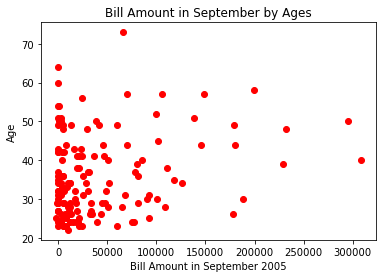

In [23]:
#Scatter plot and random sampling
import matplotlib.pyplot as plt
sample= convert_data.sample(150)
x= sample['BILL8']
y= sample['AGE']
plt.scatter (x, y, c="red")
plt.title("Bill Amount in September by Age")
plt.xlabel("Bill Amount in September 2005")
plt.ylabel("Age")
plt.show()

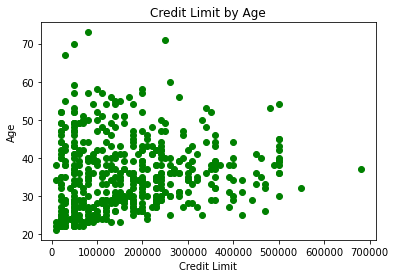

In [24]:
#Scatterplot of Age vs Credit Limit- random sampling
import matplotlib.pyplot as plt
sample= convert_data.sample(500)
x= sample['CRLIM']
y= sample['AGE']
plt.scatter (x, y, c="green")
plt.title("Credit Limit by Age")
plt.xlabel("Credit Limit")
plt.ylabel("Age")
plt.show()

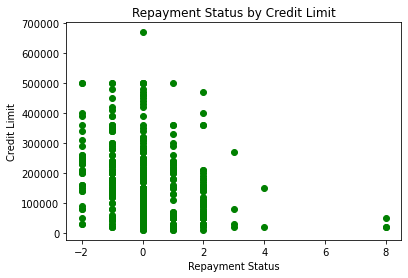

In [30]:
#Scatterplot of Age vs Credit Limit- random sampling
import matplotlib.pyplot as plt
sample= convert_data.sample(400)
x= sample['RPS9']
y= sample['CRLIM']
plt.scatter (x, y, c="green")
plt.title("Repayment Status by Credit Limit")
plt.xlabel("Repayment Status")
plt.ylabel("Credit Limit")
plt.show()

BILL9


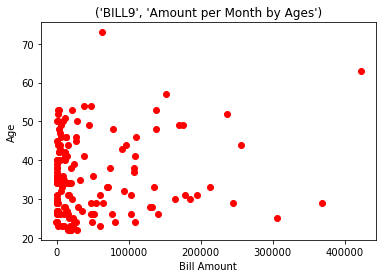

BILL8


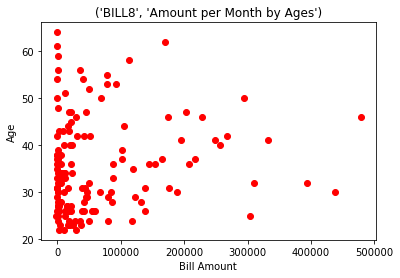

BILL7


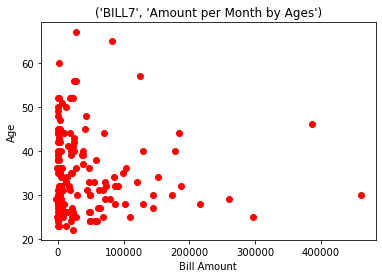

BILL6


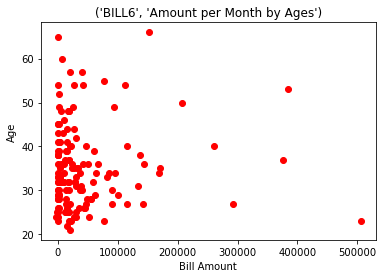

BILL5


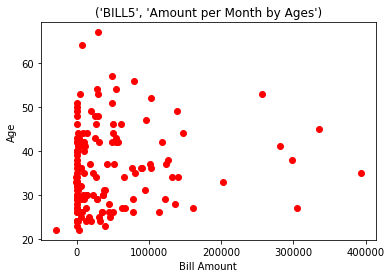

BILL4


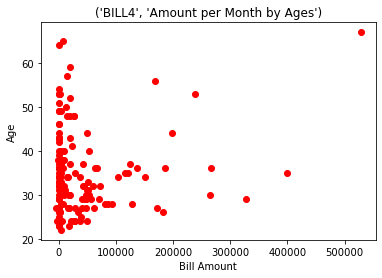

In [25]:
# iterating the columns
for col in convert_data.columns:
    if col.startswith('BILL'):
        sample= convert_data.sample(150)
        x= sample[col]
        y= sample['AGE']
        plt.scatter (x, y, c="red")
        plt.title((col, "Amount per Month by Ages"))
        plt.xlabel("Bill Amount")
        plt.ylabel("Age")
        print(col)
        plt.show()
    

RPS9


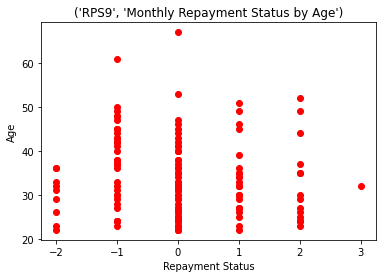

RPS8


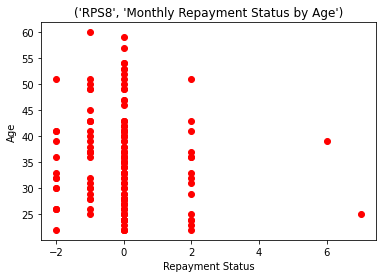

RPS7


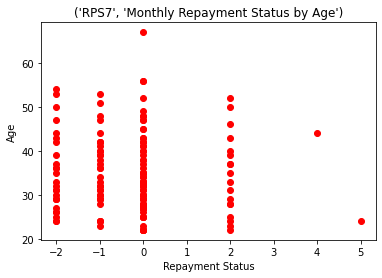

RPS6


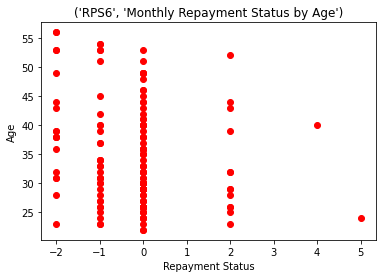

RPS5


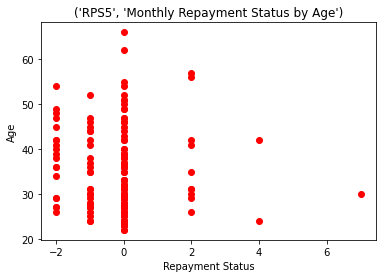

RPS4


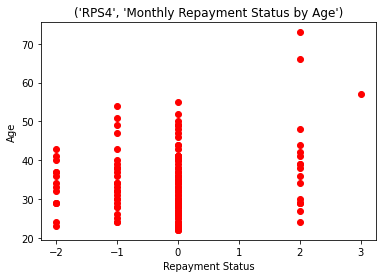

In [34]:
# iterating the columns
for col in convert_data.columns:
    if col.startswith('RPS'):
        sample= convert_data.sample(150)
        x= sample[col]
        y= sample['AGE']
        plt.scatter (x, y, c="red")
        plt.title((col, "Monthly Repayment Status by Age"))
        plt.xlabel("Repayment Status")
        plt.ylabel("Age")
        print(col)
        plt.show()

RPS9


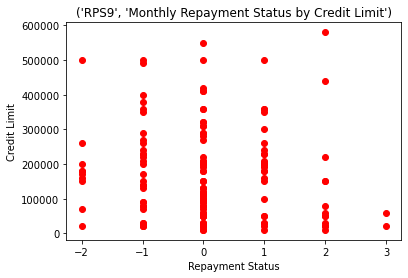

RPS8


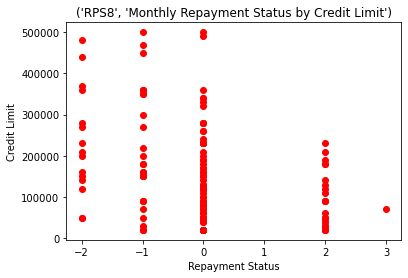

RPS7


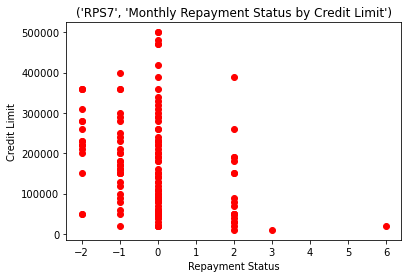

RPS6


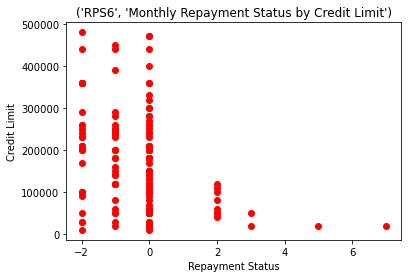

RPS5


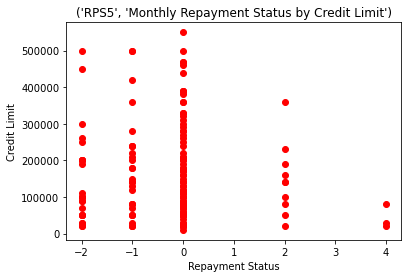

RPS4


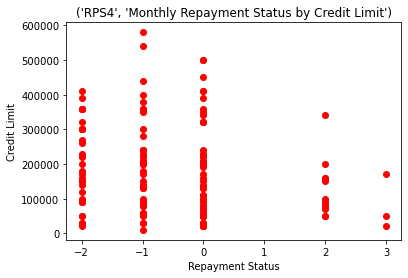

In [35]:
# iterating the columns
for col in convert_data.columns:
    if col.startswith('RPS'):
        sample= convert_data.sample(150)
        x= sample[col]
        y= sample['CRLIM']
        plt.scatter (x, y, c="red")
        plt.title((col, "Monthly Repayment Status by Credit Limit"))
        plt.xlabel("Repayment Status")
        plt.ylabel("Credit Limit")
        print(col)
        plt.show()

<AxesSubplot:title={'center':'Number of Clients by Age Category'}, ylabel='Number of Clients'>

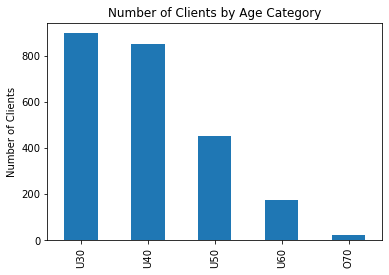

In [36]:
convert_data['AgeCat'].value_counts().plot.bar(title = "Number of Clients by Age Category", ylabel="Number of Clients")

<AxesSubplot:title={'center':'Credit Limits'}, ylabel='Number of Clients'>

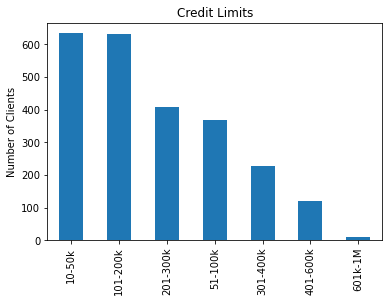

In [37]:
convert_data['CL'].value_counts().plot.bar(title = "Credit Limits", ylabel="Number of Clients")

<AxesSubplot:title={'center':'Credit Limits'}>

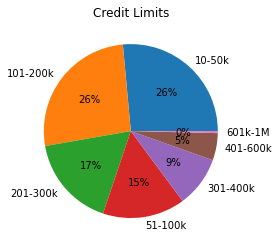

In [38]:
convert_data['CL'].value_counts().plot.pie(ylabel="", title="Credit Limits",autopct='%1.0f%%')

In [39]:
convert_data.groupby(["AgeCat", "CL"], as_index=False)["DEF"].count()

,AgeCat,CL,DEF
0,U30,10-50k,305
1,U30,51-100k,178
2,U30,101-200k,228
3,U30,201-300k,111
4,U30,301-400k,57
5,U30,401-600k,17
6,U30,601k-1M,1
7,U40,10-50k,147
8,U40,51-100k,108
9,U40,101-200k,251


<AxesSubplot:title={'center':'Clients by Age'}>

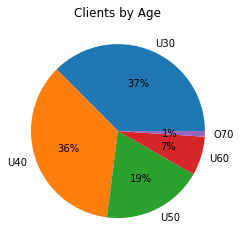

In [40]:
convert_data['AgeCat'].value_counts().plot.pie(ylabel="", title="Clients by Age",autopct='%1.0f%%')

<AxesSubplot:title={'center':'Default Status by Age Group'}, xlabel='Age Categories', ylabel='Number of Clients'>

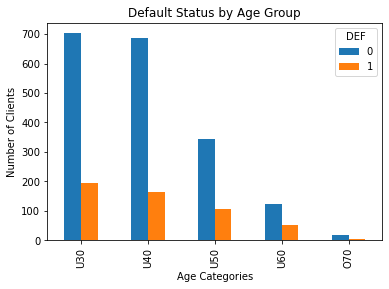

In [41]:
# Number of default and not default clients in each age category where DEF 0= not default and DEF 1= default
convert_data.groupby(['AgeCat', 'DEF'])['AgeCat'].count().unstack().plot.bar(title= "Default Status by Age Group", ylabel= "Number of Clients", xlabel="Age Categories")

<AxesSubplot:xlabel='Credit Limit', ylabel='Number of Clients'>

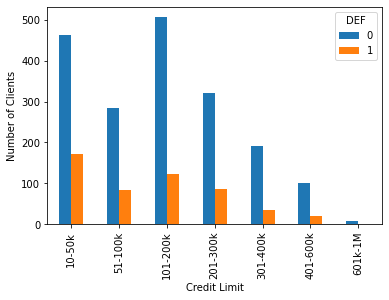

In [43]:
# Number of default and not default clients in each credit limit category where DEF 0= not default and DEF 1= default
convert_data.groupby(['CL', 'DEF'])['CL'].count().unstack().plot.bar(ylabel= "Number of Clients", xlabel="Credit Limit")

<AxesSubplot:title={'center':'Default Status by Credit Limit per Age Group'}, xlabel='Age,CL', ylabel='Number of Clients'>

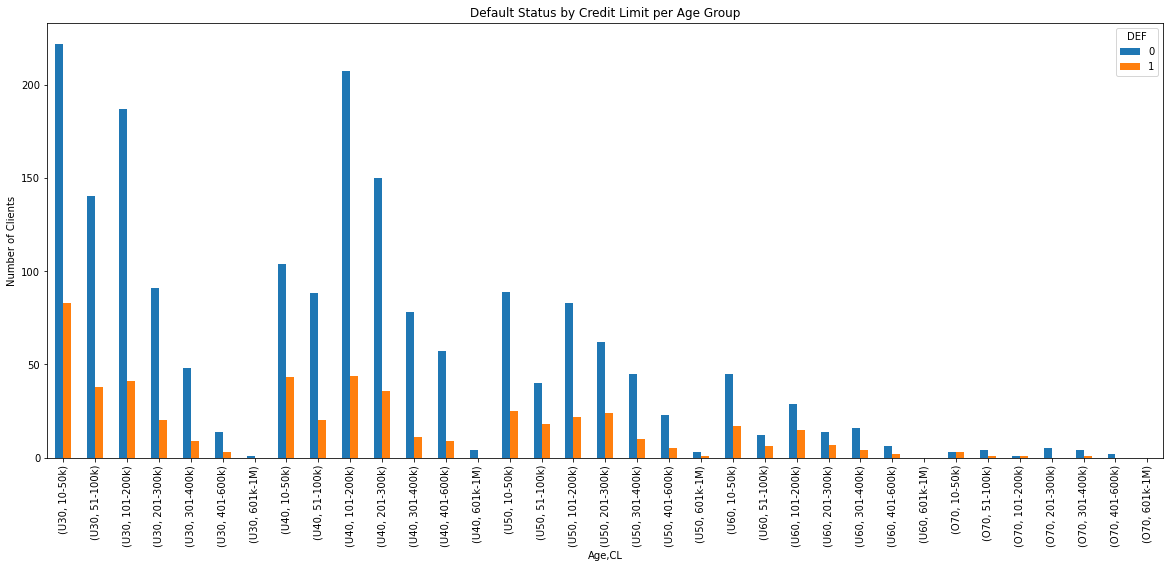

In [45]:
convert_data.groupby(['AgeCat', 'CL', 'DEF'])['CL'].count().unstack().plot.bar(title= "Default Status by Credit Limit per Age Group", xlabel="Age,CL", ylabel="Number of Clients", figsize=(20,8))

<AxesSubplot:title={'center':'Default Status by Credit Limit per Marriage Group'}, xlabel='Marriage,CL', ylabel='Number of Clients'>

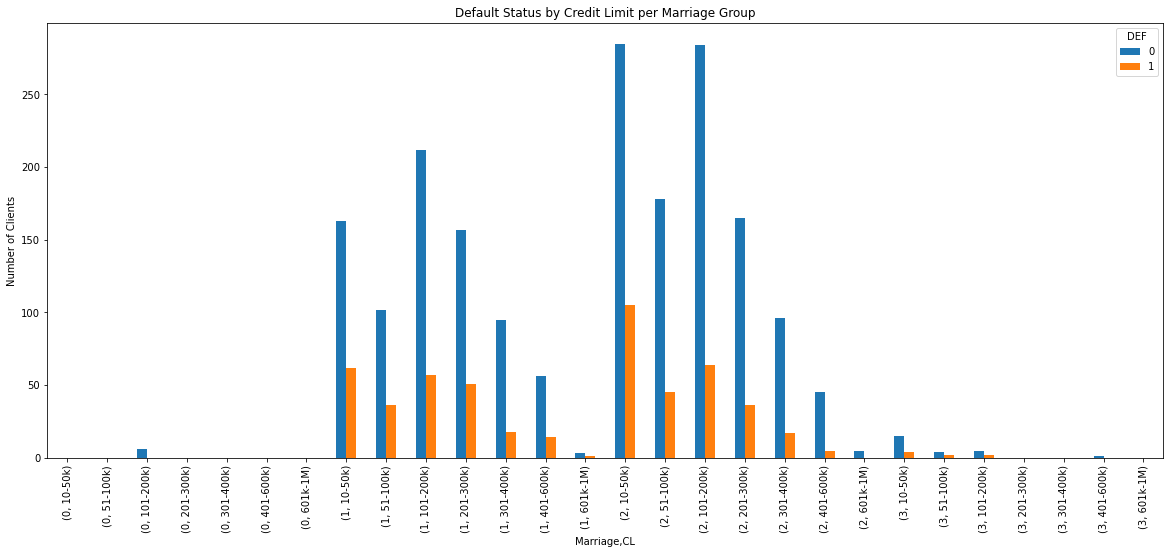

In [46]:
convert_data.groupby(['MARRIAGE', 'CL', 'DEF'])['CL'].count().unstack().plot.bar(title= "Default Status by Credit Limit per Marriage Group", xlabel="Marriage,CL", ylabel="Number of Clients", figsize=(20,8))

<AxesSubplot:title={'center':'Default Status by Credit Limit per Education Status'}, xlabel='EDU,CL', ylabel='Number of Clients'>

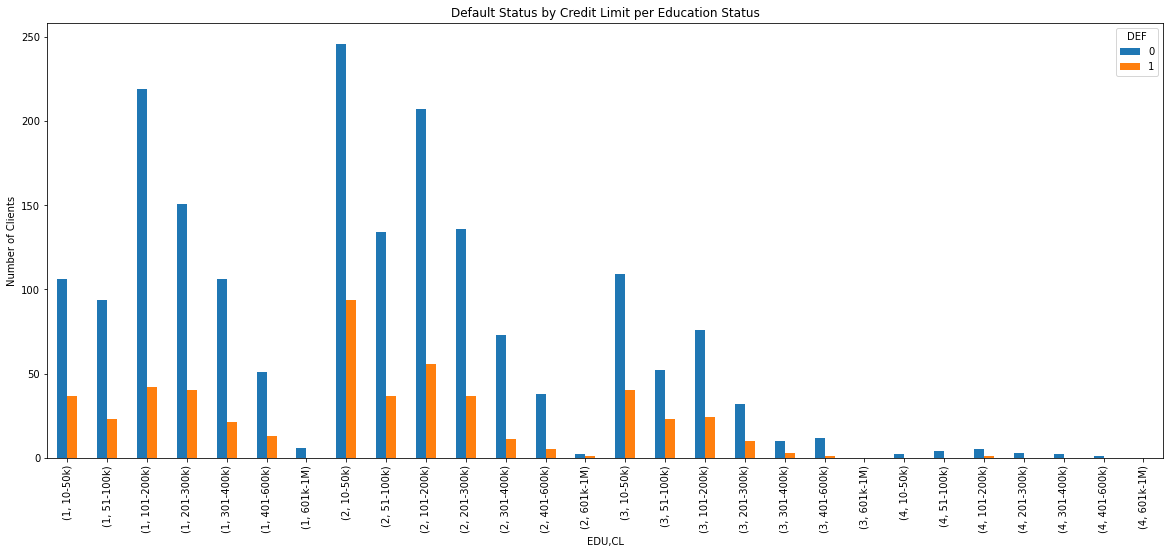

In [47]:
#EDU 1= GS, 2=UNI 3=HS 4= Other
convert_data.groupby(['EDU', 'CL', 'DEF'])['DEF'].count().unstack().plot.bar(title= "Default Status by Credit Limit per Education Status", xlabel="EDU,CL", ylabel="Number of Clients", figsize=(20,8))

In [48]:
# Number of Defaults per education status (parenthesis is paramater, brackets are index)
DEFbyEDU=convert_data.groupby('EDU')['DEF'].count()
print(DEFbyEDU)

EDU
1     909
2    1077
3     392
4      18
Name: DEF, dtype: int64


<AxesSubplot:title={'center':'Education Status'}>

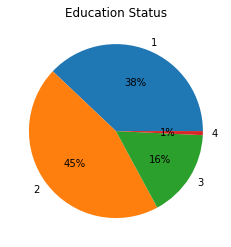

In [49]:
DEFbyEDU.plot(kind="pie", autopct='%1.0f%%', title="Education Status", ylabel="", )

<AxesSubplot:title={'center':'Gender'}>

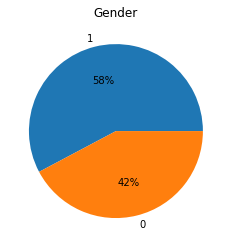

In [50]:
convert_data['SEX'].value_counts().plot.pie(ylabel="", title="Gender",autopct='%1.0f%%')

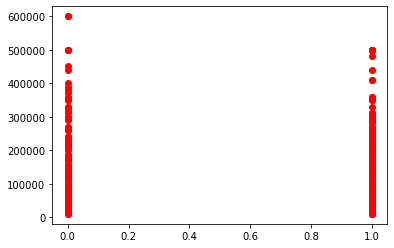

In [52]:
#Scatter plot and random sampling
import matplotlib.pyplot as plt
sample= convert_data.sample(250)
x= sample['SEX']
y= sample['CRLIM']
plt.scatter (x, y, c="red")
plt.show()

# CREDIT - Get Dummies

In [172]:
credit = pd.get_dummies(convert_data)
print(credit)

       CRLIM  MARRIAGE  AGE  RPS9  RPS8  RPS7  RPS6  RPS5  RPS4  BILL9  ...  \
0      20000         1   24     2     2    -1    -1    -2    -2   3913  ...   
1     120000         2   26    -1     2     0     0     0     2   2682  ...   
2      90000         2   34     0     0     0     0     0     0  29239  ...   
3      50000         1   37     0     0     0     0     0     0  46990  ...   
4      50000         1   57    -1     0    -1     0     0     0   8617  ...   
...      ...       ...  ...   ...   ...   ...   ...   ...   ...    ...  ...   
2391   50000         1   32     2     3     2     2     2     2  39589  ...   
2392   20000         2   49     0     0     2     0    -1    -1   8503  ...   
2393  130000         2   24     1    -2    -1    -1    -1    -1    -10  ...   
2394  110000         1   27     0     0     0     0     0     0  61152  ...   
2395  200000         1   29     0     0     0     2     2     2  45982  ...   

      AgeCat_U50  AgeCat_U60  AgeCat_O70  CL_10-50k

In [173]:
credit.dtypes

CRLIM                  int64
MARRIAGE               int64
AGE                    int64
RPS9                   int64
RPS8                   int64
RPS7                   int64
RPS6                   int64
RPS5                   int64
RPS4                   int64
BILL9                  int64
BILL8                  int64
BILL7                  int64
BILL6                  int64
BILL5                  int64
BILL4                  int64
DEF                    int64
SEX_female             uint8
SEX_male               uint8
EDU_graduate school    uint8
EDU_high school        uint8
EDU_other              uint8
EDU_university         uint8
AgeCat_U30             uint8
AgeCat_U40             uint8
AgeCat_U50             uint8
AgeCat_U60             uint8
AgeCat_O70             uint8
CL_10-50k              uint8
CL_51-100k             uint8
CL_101-200k            uint8
CL_201-300k            uint8
CL_301-400k            uint8
CL_401-600k            uint8
CL_601k-1M             uint8
dtype: object

In [174]:
print(credit.isnull().sum())

CRLIM                  0
MARRIAGE               0
AGE                    0
RPS9                   0
RPS8                   0
RPS7                   0
RPS6                   0
RPS5                   0
RPS4                   0
BILL9                  0
BILL8                  0
BILL7                  0
BILL6                  0
BILL5                  0
BILL4                  0
DEF                    0
SEX_female             0
SEX_male               0
EDU_graduate school    0
EDU_high school        0
EDU_other              0
EDU_university         0
AgeCat_U30             0
AgeCat_U40             0
AgeCat_U50             0
AgeCat_U60             0
AgeCat_O70             0
CL_10-50k              0
CL_51-100k             0
CL_101-200k            0
CL_201-300k            0
CL_301-400k            0
CL_401-600k            0
CL_601k-1M             0
dtype: int64


<AxesSubplot:title={'center':'Default'}>

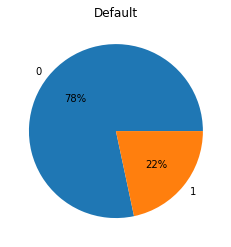

In [176]:
credit['DEF'].value_counts().plot.pie(ylabel="", title="Default",autopct='%1.0f%%')

### CREDIT Histograms

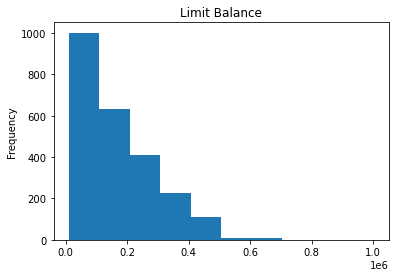

Text(0, 0.5, 'Dollars, 10K')

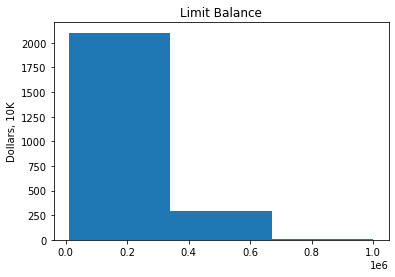

In [178]:
plt.hist(credit['CRLIM'])
plt.title('Limit Balance')
plt.ylabel('Frequency')
plt.show()
plt.hist(credit['CRLIM'], bins=3)
plt.title('Limit Balance')
plt.ylabel('Frequency')
plt.ylabel('Dollars, 10K')

Text(0, 0.5, 'Frequency')

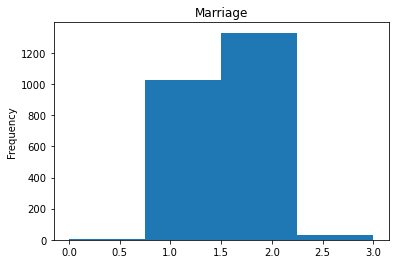

In [179]:
plt.hist(credit['MARRIAGE'], bins=4)
plt.title('Marriage')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

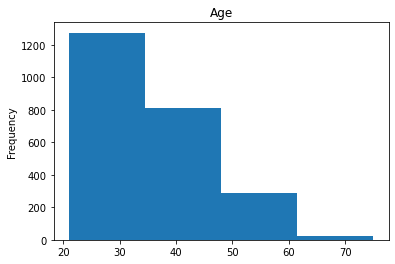

In [180]:
plt.hist(credit['AGE'], bins=4)
plt.title('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

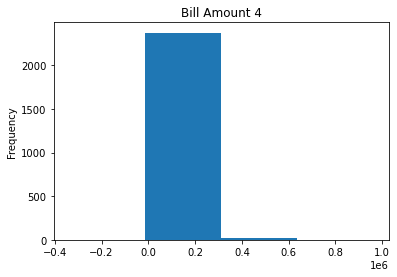

In [181]:
plt.hist(credit['BILL4'], bins=4)
plt.title('Bill Amount 4')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

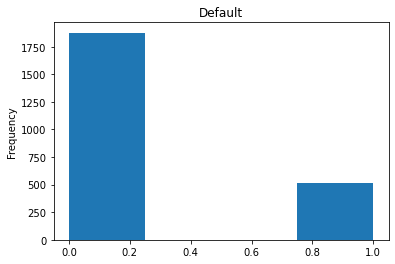

In [182]:
plt.hist(credit['DEF'], bins=4)
plt.title('Default')
plt.ylabel('Frequency')

### CREDIT Bar Plots

<AxesSubplot:title={'center':'Credit Limits'}, ylabel='Frequency of Credit Limit'>

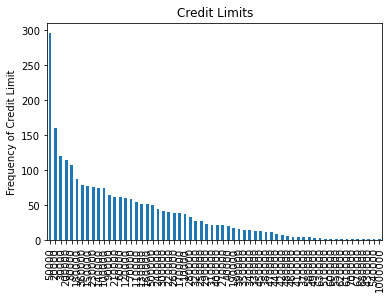

In [183]:
data['CRLIM'].value_counts().plot.bar(title = "Credit Limits", ylabel="Frequency of Credit Limit")

### CREDIT Line Plots

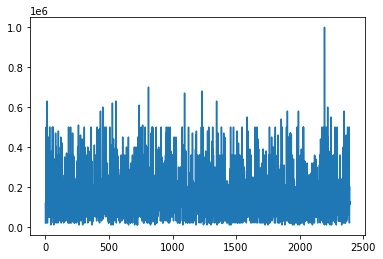

In [184]:
plt.plot(credit['CRLIM'])
plt.show()

# Scatterplots

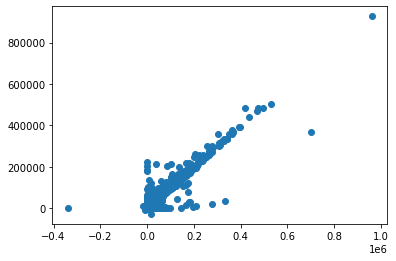

In [185]:
x = credit['BILL4']
y = credit['BILL5']
plt.scatter(x,y)
plt.show()

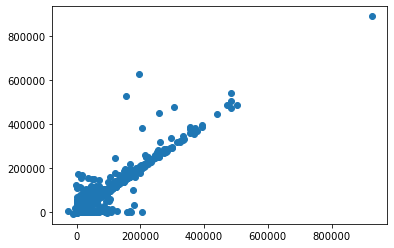

In [187]:
x = credit['BILL5']
y = credit['BILL6']
plt.scatter(x,y)
plt.show()

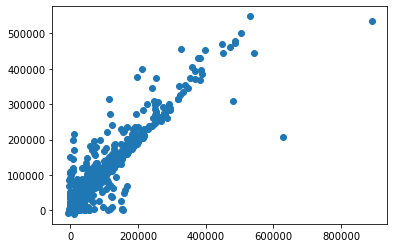

In [186]:
x = credit['BILL6']
y = credit['BILL7']
plt.scatter(x,y)
plt.show()

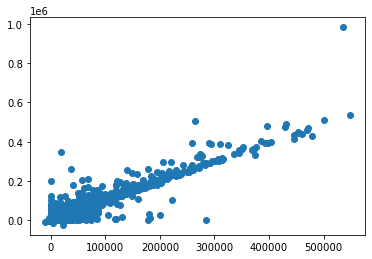

In [188]:
x = credit['BILL7']
y = credit['BILL8']
plt.scatter(x,y)
plt.show()

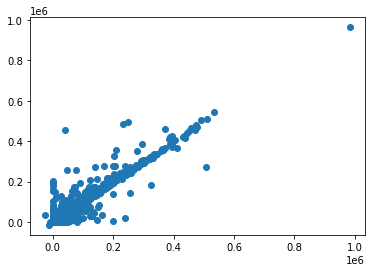

In [189]:
x = credit['BILL8']
y = credit['BILL9']
plt.scatter(x,y)
plt.show()

### CREDIT Box Plots

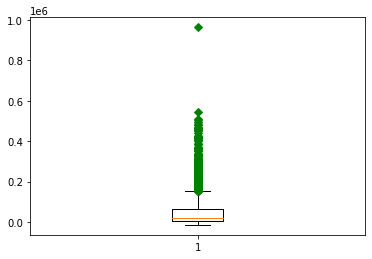

In [191]:
A = credit['BILL9']
plt.boxplot(A,0,'gD')
plt.show()

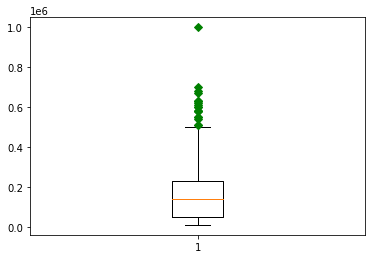

In [192]:
A = data['CRLIM']
plt.boxplot(A,0,'gD')
plt.show()

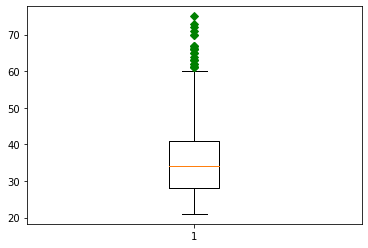

In [193]:
A = data['AGE']
plt.boxplot(A,0,'gD')
plt.show()

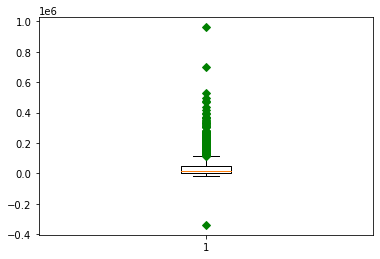

In [194]:
A = data['BILL4']
plt.boxplot(A,0,'gD')
plt.show()

# Correlation

In [195]:
corrMat = credit.corr()
print(corrMat)

                        CRLIM  MARRIAGE       AGE      RPS9      RPS8  \
CRLIM                1.000000 -0.147788  0.154974 -0.200540 -0.248233   
MARRIAGE            -0.147788  1.000000 -0.420270  0.025893  0.037293   
AGE                  0.154974 -0.420270  1.000000 -0.017835 -0.029903   
RPS9                -0.200540  0.025893 -0.017835  1.000000  0.637668   
RPS8                -0.248233  0.037293 -0.029903  0.637668  1.000000   
RPS7                -0.236194  0.038955 -0.037790  0.547805  0.763806   
RPS6                -0.224340  0.046826 -0.024571  0.497509  0.667189   
RPS5                -0.213442  0.044533 -0.012634  0.472577  0.639244   
RPS4                -0.210881  0.041117 -0.009462  0.445626  0.606825   
BILL9                0.361823 -0.040450  0.068263  0.171638  0.225230   
BILL8                0.361342 -0.037658  0.061591  0.175226  0.229758   
BILL7                0.365711 -0.047310  0.065932  0.173459  0.232926   
BILL6                0.375659 -0.038152  0.058714  

# Covariance

In [196]:
covMat = credit.cov()
print(covMat)

                            CRLIM      MARRIAGE            AGE          RPS9  \
CRLIM                1.676861e+10 -10058.566644  189691.134493 -29175.023787   
MARRIAGE            -1.005857e+04      0.276248      -2.087939      0.015290   
AGE                  1.896911e+05     -2.087939      89.346812     -0.189402   
RPS9                -2.917502e+04      0.015290      -0.189402      1.262192   
RPS8                -3.882758e+04      0.023676      -0.341421      0.865345   
RPS7                -3.815289e+04      0.025540      -0.445582      0.767712   
RPS6                -3.417397e+04      0.028952      -0.273211      0.657512   
RPS5                -3.197111e+04      0.027074      -0.138139      0.614136   
RPS4                -3.227379e+04      0.025541      -0.105708      0.591692   
BILL9                3.648630e+09  -1655.601465   50246.908772  15016.264546   
BILL8                3.532902e+09  -1494.415030   43956.155322  14863.644606   
BILL7                3.297613e+09  -1731

# Default Data Frame

In [109]:
# drop rows def <1
defaultdata = convert_data[convert_data['DEF'] == 1]
 
# Print the new dataframe
defaultdata.head(15)

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,BILL8,BILL7,BILL6,BILL5,BILL4,DEF,AgeCat,CL
0,20000,1,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1,U30,10-50k
1,120000,1,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,1,U30,101-200k
13,70000,0,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,1,U30,51-100k
16,20000,0,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,1,U30,10-50k
21,120000,1,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,1,U40,101-200k
22,70000,1,2,2,26,2,0,0,2,2,2,41087,42445,45020,44006,46905,46012,1,U30,51-100k
23,450000,1,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,1,U40,401-600k
26,60000,0,1,2,27,1,-2,-1,-1,-1,-1,-109,-425,259,-57,127,-189,1,U30,51-100k
31,50000,0,2,2,33,2,0,0,0,0,0,30518,29618,22102,22734,23217,23680,1,U40,10-50k
38,50000,0,1,2,25,1,-1,-1,-2,-2,-2,0,780,0,0,0,0,1,U30,10-50k


In [54]:
defaultdata.count()

CRLIM       519
SEX         519
EDU         519
MARRIAGE    519
AGE         519
RPS9        519
RPS8        519
RPS7        519
RPS6        519
RPS5        519
RPS4        519
BILL9       519
BILL8       519
BILL7       519
BILL6       519
BILL5       519
BILL4       519
DEF         519
AgeCat      519
CL          519
dtype: int64

In [55]:
#Check to ensure no other value except "1" are within my default data dataframe
xyz = []
for x in range(len(defaultdata)):
    if defaultdata.iloc[x,17] != 1:
        xyz.add(x)
print(xyz)

[]


Text(0.5, 1.0, 'Default Clients per Credit Limit Category')

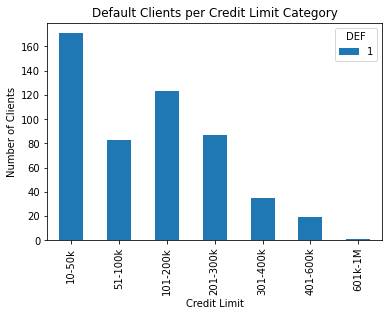

In [56]:
# Number of default clients in each credit limit category where DEF 1= default
defaultdata.groupby(['CL', 'DEF'])['CL'].count().unstack().plot.bar(ylabel= "Number of Clients", xlabel="Credit Limit")
plt.title('Default Clients per Credit Limit Category')

Text(0.5, 1.0, 'Default Clients per Age Group')

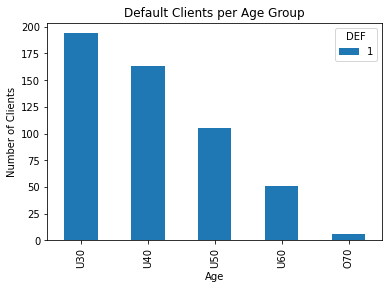

In [57]:
# Number of default clients in each age category where DEF 1= default
defaultdata.groupby(['AgeCat', 'DEF'])['AgeCat'].count().unstack().plot.bar(ylabel= "Number of Clients", xlabel="Age")
plt.title('Default Clients per Age Group')

Text(0.5, 1.0, 'Default Clients per Marriage Status')

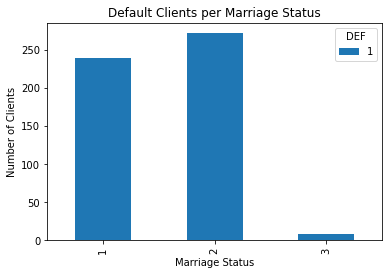

In [58]:
# Number of marrried vs non married default clients where DEF 1= default
defaultdata.groupby(['MARRIAGE', 'DEF'])['MARRIAGE'].count().unstack().plot.bar(ylabel= "Number of Clients", xlabel="Marriage Status")
plt.title('Default Clients per Marriage Status')

Text(0.5, 1.0, 'Default Clients per Education Level')

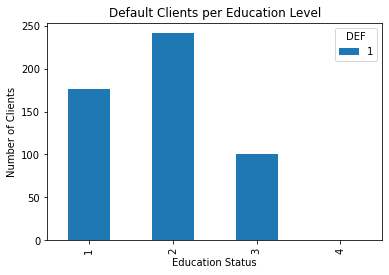

In [59]:
# Number of marrried vs non married default clients where DEF 1= default
defaultdata.groupby(['EDU', 'DEF'])['EDU'].count().unstack().plot.bar(ylabel= "Number of Clients", xlabel="Education Status")
plt.title('Default Clients per Education Level')

<AxesSubplot:title={'center':'Default Clients per Credit Limit'}, xlabel='Default Status', ylabel='Number of Clients'>

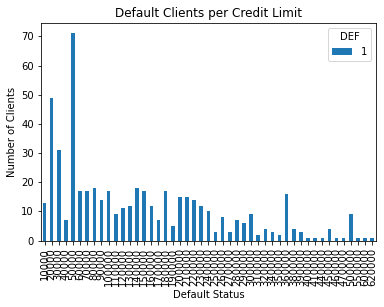

In [206]:
# Number of default clients by credit limit
defaultdata.groupby(['CRLIM', 'DEF'])['CRLIM'].count().unstack().plot.bar(title= "Default Clients per Credit Limit", ylabel= "Number of Clients", xlabel="Default Status")

In [84]:
rawdata.head()

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,...,BILL6,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4,DEF
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [85]:
default_data= rawdata[rawdata['DEF'] == 'default']
# Print the new default_data dataframe
default_data.head(10)

,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,...,BILL6,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4,DEF
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
13,70000,male,university,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,default
16,20000,male,graduate school,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,default
21,120000,female,university,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,default
22,70000,female,university,2,26,2,0,0,2,2,...,44006,46905,46012,2007,3582,0,3601,0,1820,default
23,450000,female,graduate school,1,40,-2,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,default
26,60000,male,graduate school,2,27,1,-2,-1,-1,-1,...,-57,127,-189,0,1000,0,500,0,1000,default
31,50000,male,university,2,33,2,0,0,0,0,...,22734,23217,23680,1718,1500,1000,1000,1000,716,default
38,50000,male,graduate school,2,25,1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,default


In [86]:
default_data.count()

CRLIM       519
SEX         519
EDU         519
MARRIAGE    519
AGE         519
RPS9        519
RPS8        519
RPS7        519
RPS6        519
RPS5        519
RPS4        519
BILL9       519
BILL8       519
BILL7       519
BILL6       519
BILL5       519
BILL4       519
PAY9        519
PAY8        519
PAY7        519
PAY6        519
PAY5        519
PAY4        519
DEF         519
dtype: int64

Text(0.5, 1.0, 'Default Clients per Credit Limit')

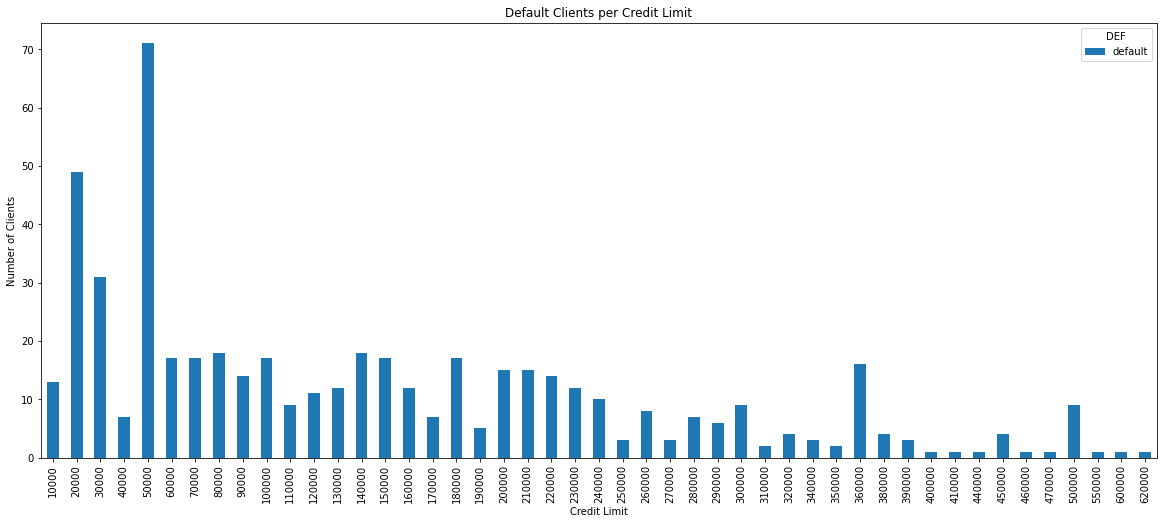

In [97]:
# Number of default clients in each credit limit category where DEF 1= default
default_data.groupby(['CRLIM', 'DEF'])['CRLIM'].count().unstack().plot.bar(ylabel= "Number of Clients", xlabel="Credit Limit", figsize=(20,8))
plt.title('Default Clients per Credit Limit')

In [93]:
default_data.describe()

,CRLIM,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,RPS4,BILL9,...,BILL7,BILL6,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,...,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,145067.437380,1.554913,36.132948,0.620424,0.327553,0.337187,0.136802,0.152216,0.042389,51285.431599,...,46844.019268,42683.088632,40346.034682,39448.404624,3400.421965,3370.868979,3410.075145,3339.643545,4215.716763,3994.520231
std,121343.609247,0.527588,10.147543,1.303562,1.505662,1.611968,1.535479,1.540305,1.537854,79463.623001,...,74719.789949,70142.660226,63377.864910,65116.610716,6107.429097,9810.190812,8906.549401,10908.428468,18748.943364,18475.441356
min,10000.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2000.000000,...,-2000.000000,-2898.000000,-3272.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2089.500000,...,1870.500000,1604.500000,1212.000000,780.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110000.000000,2.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19625.000000,...,19543.000000,17560.000000,16853.000000,16314.000000,1800.000000,1400.000000,1000.000000,1000.000000,1020.000000,1000.000000
75%,210000.000000,2.000000,42.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,59317.500000,...,51519.500000,48059.000000,47101.500000,47896.000000,3598.500000,3152.000000,3182.500000,3000.000000,3000.000000,3000.000000
max,620000.000000,3.000000,73.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,546741.000000,...,548020.000000,530672.000000,484612.000000,434715.000000,81690.000000,167622.000000,110699.000000,171716.000000,332000.000000,345293.000000


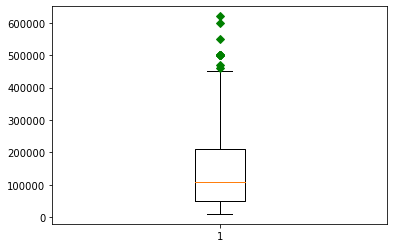

In [95]:
A = default_data['CRLIM']
plt.boxplot(A,0,'gD')
plt.show()

In [96]:
default_data['CRLIM'].describe()

count       519.000000
mean     145067.437380
std      121343.609247
min       10000.000000
25%       50000.000000
50%      110000.000000
75%      210000.000000
max      620000.000000
Name: CRLIM, dtype: float64

Text(0.5, 1.0, 'Default Clients per Age')

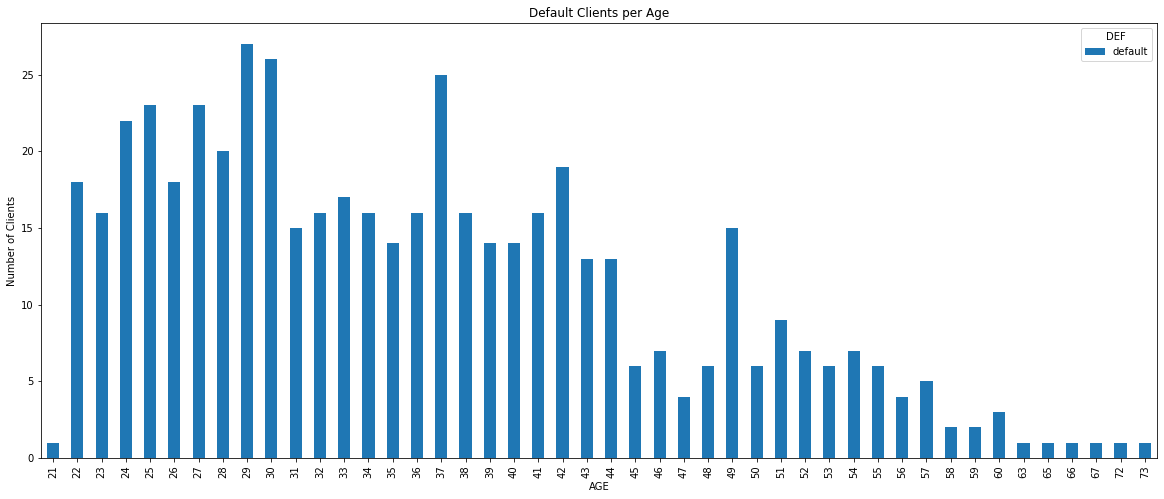

In [98]:
# Number of default clients in each credit limit category where DEF 1= default
default_data.groupby(['AGE', 'DEF'])['AGE'].count().unstack().plot.bar(ylabel= "Number of Clients", xlabel="AGE", figsize=(20,8))
plt.title('Default Clients per Age')

In [99]:
default_data['AGE'].describe()

count    519.000000
mean      36.132948
std       10.147543
min       21.000000
25%       28.000000
50%       35.000000
75%       42.000000
max       73.000000
Name: AGE, dtype: float64

RPS9


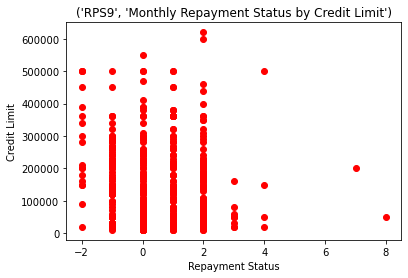

RPS8


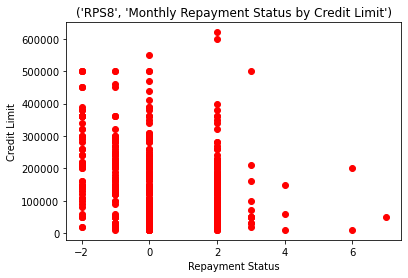

RPS7


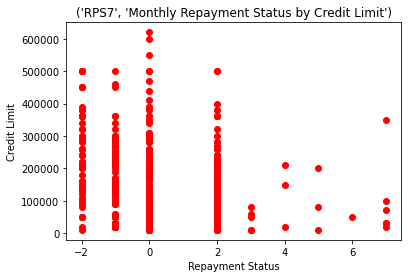

RPS6


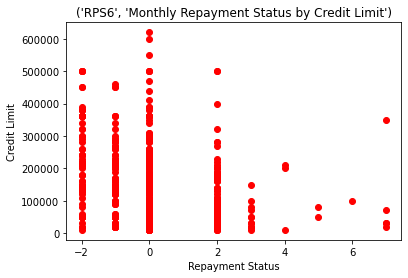

RPS5


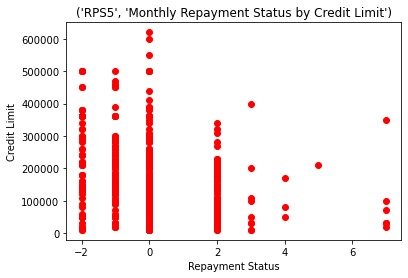

RPS4


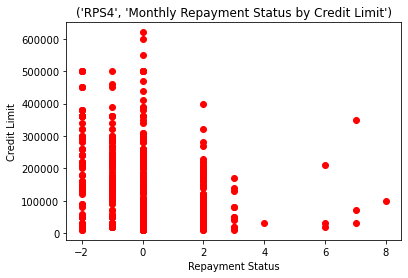

In [101]:
# iterating the columns
for col in default_data.columns:
    if col.startswith('RPS'):
        sample= default_data.sample(519)
        x= sample[col]
        y= sample['CRLIM']
        plt.scatter (x, y, c="red")
        plt.title((col, "Monthly Repayment Status by Credit Limit"))
        plt.xlabel("Repayment Status")
        plt.ylabel("Credit Limit")
        print(col)
        plt.show()

In [102]:
default_data['RPS9'].describe()

count    519.000000
mean       0.620424
std        1.303562
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: RPS9, dtype: float64

In [103]:
default_data['RPS8'].describe()

count    519.000000
mean       0.327553
std        1.505662
min       -2.000000
25%       -1.000000
50%        0.000000
75%        2.000000
max        7.000000
Name: RPS8, dtype: float64

In [104]:
default_data['RPS7'].describe()

count    519.000000
mean       0.337187
std        1.611968
min       -2.000000
25%       -1.000000
50%        0.000000
75%        2.000000
max        7.000000
Name: RPS7, dtype: float64

In [105]:
default_data['RPS6'].describe()

count    519.000000
mean       0.136802
std        1.535479
min       -2.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max        7.000000
Name: RPS6, dtype: float64

In [107]:
default_data['RPS5'].describe()

count    519.000000
mean       0.152216
std        1.540305
min       -2.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max        7.000000
Name: RPS5, dtype: float64

In [108]:
default_data['RPS4'].describe()

count    519.000000
mean       0.042389
std        1.537854
min       -2.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: RPS4, dtype: float64

In [111]:
# bin AGE
bins = [20,30,40,50,60,80]
labels = ['U30','U40','U50','U60','O70']
default_data['AgeCat'] = pd.cut(default_data['AGE'],bins,labels = labels)
default_data.head(10)

/var/folders/1v/xh0slf094mzf0frzndx95npm0000gn/T/ipykernel_45528/960010505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_data['AgeCat'] = pd.cut(default_data['AGE'],bins,labels = labels)


,CRLIM,SEX,EDU,MARRIAGE,AGE,RPS9,RPS8,RPS7,RPS6,RPS5,...,BILL5,BILL4,PAY9,PAY8,PAY7,PAY6,PAY5,PAY4,DEF,AgeCat
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,default,U30
1,120000,female,university,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,U30
13,70000,male,university,2,30,1,2,2,0,0,...,36137,36894,3200,0,3000,3000,1500,0,default,U30
16,20000,male,graduate school,2,24,0,0,2,2,2,...,17905,19104,3200,0,1500,0,1650,0,default,U30
21,120000,female,university,1,39,-1,-1,-1,-1,-1,...,632,316,316,316,0,632,316,0,default,U40
22,70000,female,university,2,26,2,0,0,2,2,...,46905,46012,2007,3582,0,3601,0,1820,default,U30
23,450000,female,graduate school,1,40,-2,-2,-2,-2,-2,...,0,0,19428,1473,560,0,0,1128,default,U40
26,60000,male,graduate school,2,27,1,-2,-1,-1,-1,...,127,-189,0,1000,0,500,0,1000,default,U30
31,50000,male,university,2,33,2,0,0,0,0,...,23217,23680,1718,1500,1000,1000,1000,716,default,U40
38,50000,male,graduate school,2,25,1,-1,-1,-2,-2,...,0,0,780,0,0,0,0,0,default,U30


<AxesSubplot:title={'center':'Defaulted Clients by Age'}>

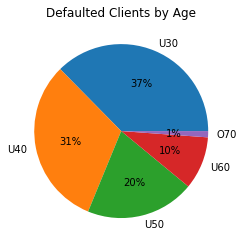

In [113]:
default_data['AgeCat'].value_counts().plot.pie(ylabel="", title="Defaulted Clients by Age",autopct='%1.0f%%')